In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

import wrangle as w
import explore as e
import my_model as m

np.random.seed(42)

# BLUF: Top 3 Models
* 1. With features1: LogisticRegression(C=1):   train/val accuracy = .808/.785; Recall = .55
* 2. With features2: DecisionTree(max_depth=6): train/val accuracy = .817/.787; Recall = .52
* 3. With features1: knn(n_neighbors=14):       train/val accuracy = .815/.787; Recall = .50

features1 = monthly_charges, tenure, contract_type, payment_type, paperless_billing, internet_service_type, 
            online_security, online_backup, device_protection, tech_support

features2 = monthly_charges, tenure, contract_type, payment_type, internet_service_type, tech_support
- i.e. features2 = features1 - paperless_billing, online_security, online_backup, device_protection

# For modeling:
* INCLUDE monthly_charges, tenure, contract_type, payment_type, paperless_billing, internet_service_type, online_security, online_backup, device_protection, tech_support
* EXCLUDE multiple_lines (and phone_service which is directly related), streaming_tv, streaming_movies, total_charges (because it's related to tenure)
* FOR NOW EXCLUDE: gender, senior_citizen, partner, dependents 

In [2]:
# acquiring and preparing the data for exploration
df = w.get_telco_data()
e_df = w.prep_telco_to_explore(df)

# splitting data into train, validate, and test
target = 'churn'
train, validate, test = w.split_function(e_df, target)

# get non-encoded columns to make it easier to look at
ne_train = e.get_telco_ne_df(train)

csv file found and read
Prepared df: (7043, 48)

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


In [3]:
# reset target, prep data for modeling
target = 'churn_encoded'
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline = m.model_prep(train, validate, test, target)
print(f'baseline accuracy = {baseline}')

baseline accuracy = 0.7346745562130178


# Check some models with all columns: make/fit/use the model
1. Logistic Regression
2. knn
3. Random Forest
4. Decision Tree

## 1. Logistical Regression 
* Quick Summary up front - logit1 (C=1) is about the best with .808/.785 accuracy for train/validate

In [4]:
logit1 = LogisticRegression(C=100)

In [5]:
logit1.fit(X_train, y_train)

LogisticRegression(C=100)

In [6]:
logit1.score(X_train, y_train)

0.8075739644970414

In [7]:
y_pred = logit1.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2791          313
1_actual          500          621

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.66      0.55      0.60      1121

    accuracy                           0.81      4225
   macro avg       0.76      0.73      0.74      4225
weighted avg       0.80      0.81      0.80      4225

Accuracy: 0.8075739644970414

True Positive Rate/Sensitivity/Recall/Power: 0.5539696699375558
False Positive Rate/False Alarm Ratio/Fall-out: 0.10083762886597938
True Negative Rate/Specificity/Selectivity: 0.8991623711340206
False Negative Rate/Miss Rate: 0.44603033006244425

Precision/PPV: 0.6648822269807281
F1 Score: 0.6043795620437956

Support (0): 1121
Support (1): 3104


(2791, 313, 500, 621)

In [8]:
logit_results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)
logit_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,C,train_acc,val_acc,coef_tenure,coef_monthly_charges,coef_contract_type_One year,coef_contract_type_Two year,coef_payment_type_Credit card (automatic),coef_payment_type_Electronic check,coef_payment_type_Mailed check,coef_paperless_billing_encoded,coef_internet_service_type_Fiber optic,coef_internet_service_type_None,coef_online_security_Yes,coef_online_backup_Yes,coef_device_protection_Yes,coef_tech_support_Yes
0,0.01,0.801183,0.786373,-0.043722,0.024581,-0.288813,-0.320639,-0.075028,0.34901,-0.091132,0.330693,0.175544,-0.193654,-0.260298,-0.140783,-0.119812,-0.33065
0,0.1,0.809941,0.789212,-0.033284,0.014184,-0.685432,-1.013324,-0.025816,0.476938,-0.021109,0.470614,0.405828,-0.705947,-0.40598,-0.224687,-0.105135,-0.47101
0,1.0,0.808757,0.784954,-0.030309,0.012049,-0.804352,-1.326693,-0.038199,0.519924,0.039853,0.516732,0.471649,-0.786233,-0.406919,-0.238236,-0.0663,-0.470384
0,10.0,0.807337,0.786373,-0.029976,0.010679,-0.826431,-1.329511,-0.007159,0.503022,0.041098,0.49348,0.480453,-0.94291,-0.425693,-0.246964,-0.084157,-0.47749
0,100.0,0.807574,0.787793,-0.029847,0.010749,-0.833019,-1.35787,0.000595,0.505253,0.056702,0.493559,0.47743,-0.934151,-0.421978,-0.246462,-0.078698,-0.472674
0,1000.0,0.808757,0.787083,-0.029807,0.010787,-0.839799,-1.320755,-0.040453,0.466015,0.069523,0.508087,0.489944,-0.978024,-0.428016,-0.252996,-0.07135,-0.485026


## 2. knn 
* Quick Summary up front: setting n_neighbors to 14 when making the model has accuracy of .815/.787 for train/validate

In [9]:
knn1 = KNeighborsClassifier(n_neighbors=14)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [10]:
knn1.score(X_train, y_train)

0.8149112426035503

In [11]:
y_pred = knn1.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2880          224
1_actual          558          563

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3104
           1       0.72      0.50      0.59      1121

    accuracy                           0.81      4225
   macro avg       0.78      0.72      0.74      4225
weighted avg       0.81      0.81      0.80      4225

Accuracy: 0.8149112426035503

True Positive Rate/Sensitivity/Recall/Power: 0.5022301516503123
False Positive Rate/False Alarm Ratio/Fall-out: 0.07216494845360824
True Negative Rate/Specificity/Selectivity: 0.9278350515463918
False Negative Rate/Miss Rate: 0.4977698483496878

Precision/PPV: 0.7153748411689962
F1 Score: 0.590146750524109

Support (0): 1121
Support (1): 3104


(2880, 224, 558, 563)

In [12]:
results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate)
results_df['diff'] = results_df.train_acc - results_df.val_acc
results_df

,train_acc,val_acc,diff
1,0.994793,0.736693,0.258100
2,0.875030,0.771469,0.103560
3,0.859408,0.766501,0.092907
4,0.841420,0.773598,0.067822
5,0.838343,0.754436,0.083907
6,0.831243,0.775018,0.056225
7,0.827456,0.763662,0.063793
8,0.822959,0.774308,0.048651
9,0.822249,0.772889,0.049360
10,0.818935,0.780696,0.038239


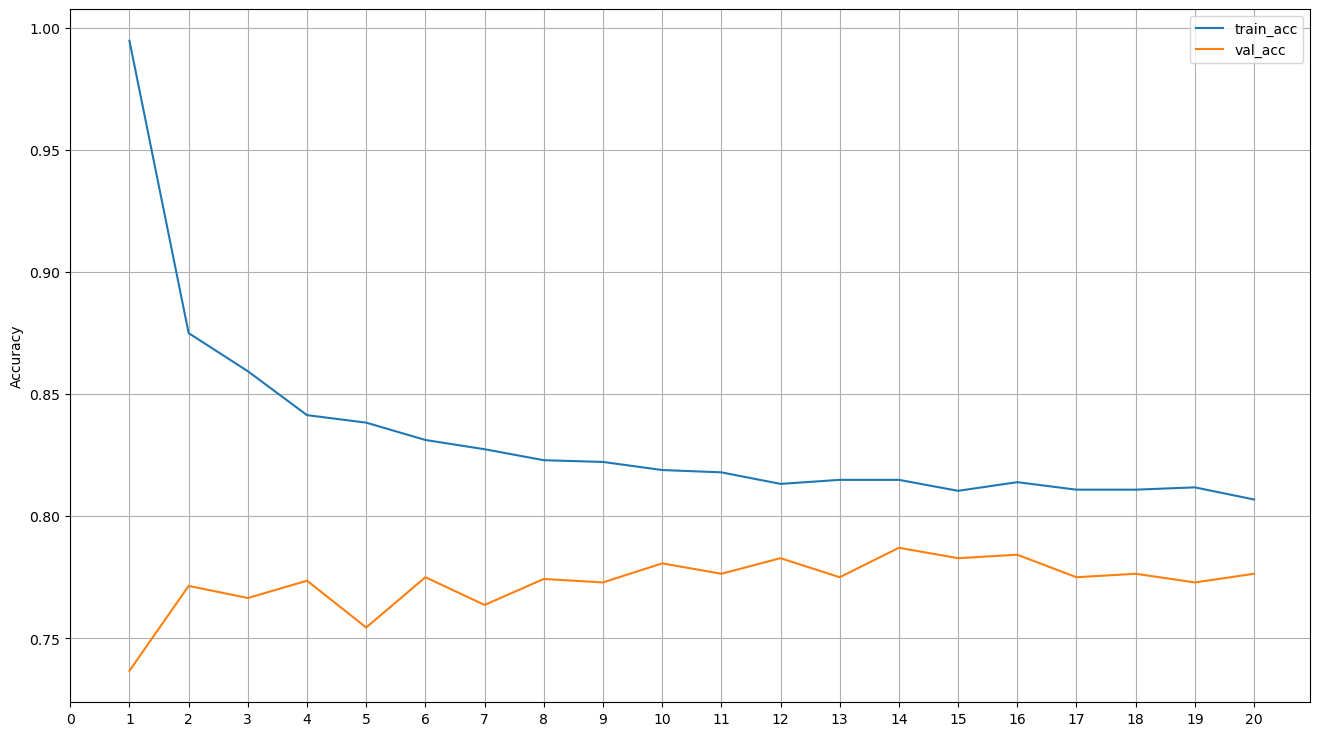

In [13]:
# plot the score
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## 3. Random Forest
* Best rf model was with min_samples_leaf = 1, max_depth = 4. Yielded an accuracy of .799/.781 on train/validate

In [14]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=4, random_state=42)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [16]:
y_pred = rf.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2935          169
1_actual          681          440

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3104
           1       0.72      0.39      0.51      1121

    accuracy                           0.80      4225
   macro avg       0.77      0.67      0.69      4225
weighted avg       0.79      0.80      0.78      4225

Accuracy: 0.7988165680473372

True Positive Rate/Sensitivity/Recall/Power: 0.39250669045495096
False Positive Rate/False Alarm Ratio/Fall-out: 0.054445876288659795
True Negative Rate/Specificity/Selectivity: 0.9455541237113402
False Negative Rate/Miss Rate: 0.6074933095450491

Precision/PPV: 0.722495894909688
F1 Score: 0.5086705202312138

Support (0): 1121
Support (1): 3104


(2935, 169, 681, 440)

In [17]:
y_pred = rf.predict(X_validate)
m.get_classifier_metrics(y_validate, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          960           75
1_actual          234          140

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1035
           1       0.65      0.37      0.48       374

    accuracy                           0.78      1409
   macro avg       0.73      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409

Accuracy: 0.7806955287437899

True Positive Rate/Sensitivity/Recall/Power: 0.37433155080213903
False Positive Rate/False Alarm Ratio/Fall-out: 0.07246376811594203
True Negative Rate/Specificity/Selectivity: 0.927536231884058
False Negative Rate/Miss Rate: 0.6256684491978609

Precision/PPV: 0.6511627906976745
F1 Score: 0.4753820033955858

Support (0): 374
Support (1): 1035


(960, 75, 234, 140)

In [18]:
results_df = m.get_rf_scores(X_train, X_validate, y_train, y_validate)
results_df.T

,0,1,2,3,4,5,6,7,8,9
min_samples_leaf,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
trn_acc_depth_1,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675
val_acc_depth_1,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564
diff_1,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111
trn_acc_depth_2,0.752663,0.752663,0.752663,0.752663,0.752663,0.752663,0.752663,0.752663,0.752663,0.752663
val_acc_depth_2,0.745209,0.745209,0.745209,0.745209,0.745209,0.745209,0.745209,0.745209,0.745209,0.745209
diff_2,0.007453,0.007453,0.007453,0.007453,0.007453,0.007453,0.007453,0.007453,0.007453,0.007453
trn_acc_depth_3,0.783669,0.783669,0.783669,0.783669,0.783669,0.783669,0.783669,0.783669,0.783669,0.783669
val_acc_depth_3,0.777857,0.777857,0.777857,0.777857,0.777857,0.777857,0.777857,0.777857,0.777857,0.778566
diff_3,0.005812,0.005812,0.005812,0.005812,0.005812,0.005812,0.005812,0.005812,0.005812,0.005102


## 4. Decision Tree
* Best DecisionTree model was with max_depth = 2 or 3; yielded an accuracy of .792/.780 on train/validate

In [19]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [20]:
tree.score(X_train, y_train)

0.7924260355029585

In [21]:
y_pred = tree.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2898          206
1_actual          671          450

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.69      0.40      0.51      1121

    accuracy                           0.79      4225
   macro avg       0.75      0.67      0.69      4225
weighted avg       0.78      0.79      0.77      4225

Accuracy: 0.7924260355029585

True Positive Rate/Sensitivity/Recall/Power: 0.40142729705619984
False Positive Rate/False Alarm Ratio/Fall-out: 0.0663659793814433
True Negative Rate/Specificity/Selectivity: 0.9336340206185567
False Negative Rate/Miss Rate: 0.5985727029438002

Precision/PPV: 0.6859756097560976
F1 Score: 0.5064715813168261

Support (0): 1121
Support (1): 3104


(2898, 206, 671, 450)

In [22]:
results_df = m.get_dtree_scores(X_train, X_validate, y_train, y_validate)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.734675,0.734564,0.000111
2,2,0.792426,0.779986,0.012440
3,3,0.792426,0.779986,0.012440
4,4,0.799290,0.777147,0.022143
5,5,0.815621,0.775727,0.039894
6,6,0.823432,0.777857,0.045575
7,7,0.836923,0.775727,0.061196
8,8,0.848284,0.770759,0.077525
9,9,0.866746,0.764372,0.102374
10,10,0.884734,0.760114,0.124620


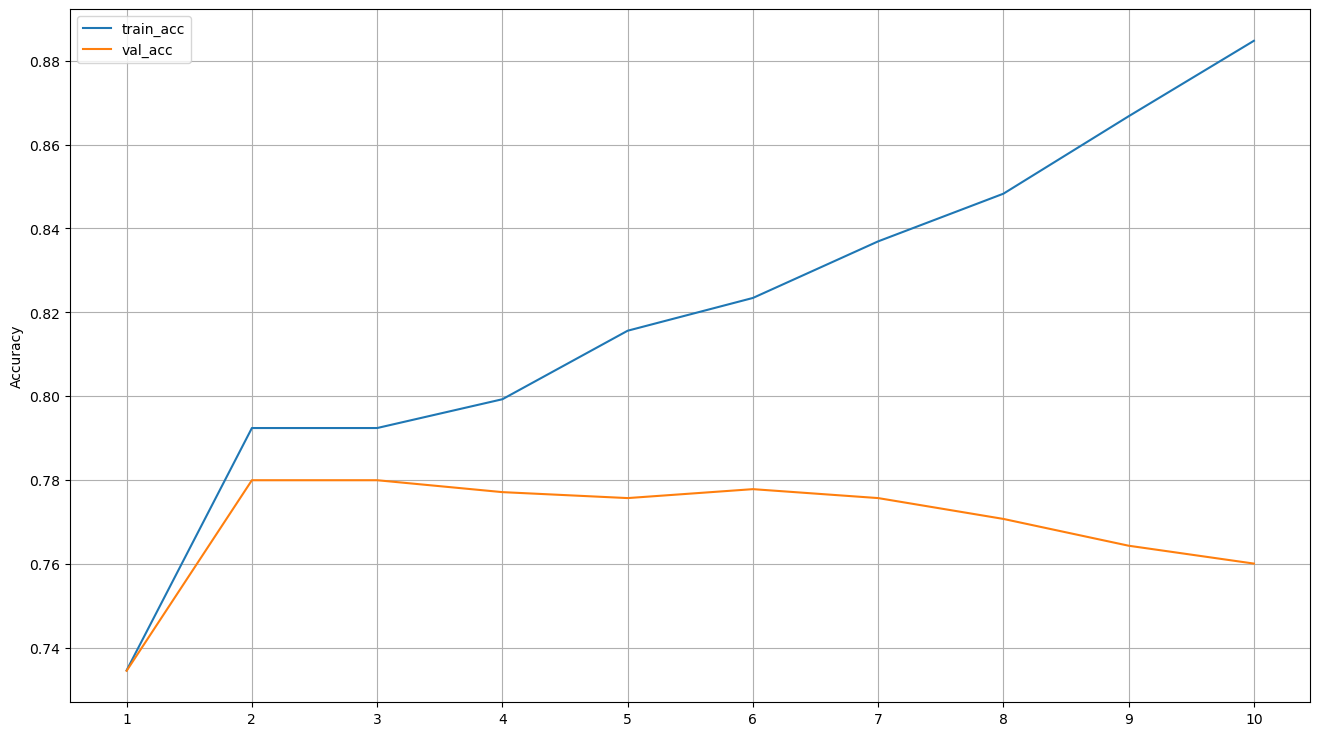

In [23]:
# plot the scores
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,11,1))
plt.grid()

# For modeling - subset of previous features:
* This time, INCLUDE monthly_charges, tenure, contract_type, payment_type, internet_service_type, tech_support
* EXCLUDE paperless_billing, online_security, online_backup, device_protection, AS WELL AS multiple_lines (and phone_service which is directly related), streaming_tv, streaming_movies, total_charges (because it's related to tenure)
* Continue to EXCLUDE: gender, senior_citizen, partner, dependents 

In [24]:
features2 = ['monthly_charges', 'tenure', 'contract_type_One year', 'contract_type_Two year', 
             'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 
             'payment_type_Mailed check', 'internet_service_type_Fiber optic', 
             'internet_service_type_None', 'tech_support_Yes']
X_train = X_train[features2] 
X_validate = X_validate[features2]
X_test = X_test[features2]


## 1. Logistic Regression
* Summary up front; C=1 still about the best with .804/.788 on train/validate with recall .54

In [25]:
logit_results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)
logit_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,C,train_acc,val_acc,coef_monthly_charges,coef_tenure,coef_contract_type_One year,coef_contract_type_Two year,coef_payment_type_Credit card (automatic),coef_payment_type_Electronic check,coef_payment_type_Mailed check,coef_internet_service_type_Fiber optic,coef_internet_service_type_None,coef_tech_support_Yes
0,0.01,0.79716,0.792761,0.023579,-0.046122,-0.312044,-0.348317,-0.071281,0.37725,-0.109344,0.242105,-0.191387,-0.357004
0,0.1,0.798817,0.787793,0.011517,-0.035918,-0.720093,-1.06607,-0.015634,0.525555,-0.048856,0.605271,-0.659462,-0.506691
0,1.0,0.803787,0.787793,0.007755,-0.032663,-0.863878,-1.407267,0.028526,0.569204,0.019749,0.723611,-0.850933,-0.494653
0,10.0,0.80213,0.787083,0.007736,-0.032242,-0.889556,-1.475512,0.022091,0.570559,0.034422,0.7318,-0.851663,-0.48168
0,100.0,0.804024,0.787083,0.007224,-0.032106,-0.888652,-1.469262,0.038749,0.57534,0.033458,0.742251,-0.881784,-0.487642
0,1000.0,0.801657,0.786373,0.007663,-0.031998,-0.894337,-1.503143,0.02731,0.567369,0.045085,0.737925,-0.852451,-0.478293


In [26]:
logit = LogisticRegression(C=.01)
logit.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [27]:
y_pred = logit.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2833          271
1_actual          586          535

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3104
           1       0.66      0.48      0.56      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.69      0.71      4225
weighted avg       0.78      0.80      0.79      4225

Accuracy: 0.7971597633136095

True Positive Rate/Sensitivity/Recall/Power: 0.47725245316681536
False Positive Rate/False Alarm Ratio/Fall-out: 0.08730670103092783
True Negative Rate/Specificity/Selectivity: 0.9126932989690721
False Negative Rate/Miss Rate: 0.5227475468331847

Precision/PPV: 0.6637717121588089
F1 Score: 0.5552672548002076

Support (0): 1121
Support (1): 3104


(2833, 271, 586, 535)

In [28]:
logit = LogisticRegression(C=1)
logit.fit(X_train, y_train)

LogisticRegression(C=1)

In [29]:
y_pred = logit.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2786          318
1_actual          511          610

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.66      0.54      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.80      0.80      0.80      4225

Accuracy: 0.8037869822485207

True Positive Rate/Sensitivity/Recall/Power: 0.544157002676182
False Positive Rate/False Alarm Ratio/Fall-out: 0.10244845360824742
True Negative Rate/Specificity/Selectivity: 0.8975515463917526
False Negative Rate/Miss Rate: 0.455842997323818

Precision/PPV: 0.6573275862068966
F1 Score: 0.5954123962908736

Support (0): 1121
Support (1): 3104


(2786, 318, 511, 610)

## 2. knn
* Summary up front: n_neighbors = 14 still about the best: .811/.788 train/validate with recall .49

In [30]:
results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate)
results_df['diff'] = results_df.train_acc - results_df.val_acc
results_df

,train_acc,val_acc,diff
1,0.990769,0.746629,0.244140
2,0.869112,0.768630,0.100482
3,0.858225,0.768630,0.089595
4,0.840000,0.772179,0.067821
5,0.836686,0.760823,0.075863
6,0.830769,0.770759,0.060010
7,0.826509,0.767921,0.058588
8,0.821775,0.777857,0.043919
9,0.822722,0.775018,0.047704
10,0.817988,0.775018,0.042970


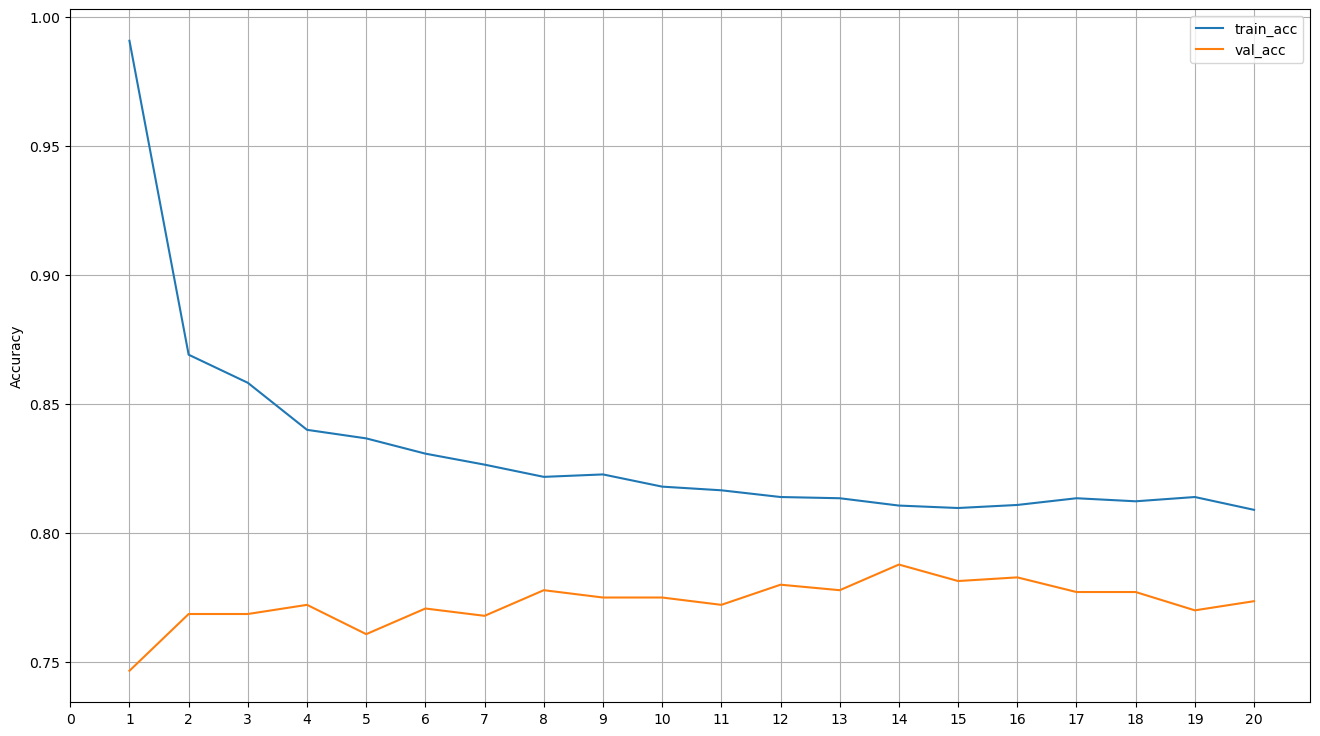

In [31]:
# plot the score
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [32]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [33]:
y_pred = knn.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2881          223
1_actual          577          544

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3104
           1       0.71      0.49      0.58      1121

    accuracy                           0.81      4225
   macro avg       0.77      0.71      0.73      4225
weighted avg       0.80      0.81      0.80      4225

Accuracy: 0.8106508875739645

True Positive Rate/Sensitivity/Recall/Power: 0.4852809991079393
False Positive Rate/False Alarm Ratio/Fall-out: 0.07184278350515463
True Negative Rate/Specificity/Selectivity: 0.9281572164948454
False Negative Rate/Miss Rate: 0.5147190008920607

Precision/PPV: 0.7092568448500652
F1 Score: 0.5762711864406779

Support (0): 1121
Support (1): 3104


(2881, 223, 577, 544)

## 3. Random Forest
* Summary up front: min_samples_leaf=1 & max_depth=3 was best: .790/.781 on train/val with .35 recall

In [36]:
results_df = m.get_rf_scores(X_train, X_validate, y_train, y_validate)
results_df.T

,0,1,2,3,4,5,6,7,8,9
min_samples_leaf,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
trn_acc_depth_1,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675
val_acc_depth_1,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564
diff_1,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111
trn_acc_depth_2,0.776331,0.776331,0.776331,0.776331,0.776331,0.776331,0.776331,0.776331,0.776331,0.776331
val_acc_depth_2,0.767921,0.767921,0.767921,0.767921,0.767921,0.767921,0.767921,0.767921,0.767921,0.767921
diff_2,0.008411,0.008411,0.008411,0.008411,0.008411,0.008411,0.008411,0.008411,0.008411,0.008411
trn_acc_depth_3,0.788166,0.788166,0.788166,0.788166,0.788166,0.788166,0.788166,0.788166,0.788166,0.788166
val_acc_depth_3,0.782115,0.782115,0.782115,0.782115,0.782115,0.782115,0.782115,0.782115,0.781405,0.781405
diff_3,0.006051,0.006051,0.006051,0.006051,0.006051,0.006051,0.006051,0.006051,0.006760,0.006760


In [35]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [37]:
y_pred = rf.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2952          152
1_actual          729          392

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3104
           1       0.72      0.35      0.47      1121

    accuracy                           0.79      4225
   macro avg       0.76      0.65      0.67      4225
weighted avg       0.78      0.79      0.76      4225

Accuracy: 0.7914792899408284

True Positive Rate/Sensitivity/Recall/Power: 0.3496877787689563
False Positive Rate/False Alarm Ratio/Fall-out: 0.04896907216494845
True Negative Rate/Specificity/Selectivity: 0.9510309278350515
False Negative Rate/Miss Rate: 0.6503122212310437

Precision/PPV: 0.7205882352941176
F1 Score: 0.4708708708708709

Support (0): 1121
Support (1): 3104


(2952, 152, 729, 392)

## 4. Decision Tree
* Summary up front: max_depth=6 was best: .817/.787 on train/val with .52 recall

In [38]:
X_train.head().T

,2332,5275,6429,89,6412
monthly_charges,94.55,49.8,54.15,86.45,111.1
tenure,12.00,1.0,59.00,27.00,54.0
contract_type_One year,0.00,0.0,0.00,0.00,0.0
contract_type_Two year,0.00,0.0,1.00,0.00,0.0
payment_type_Credit card (automatic),0.00,1.0,1.00,0.00,0.0
payment_type_Electronic check,1.00,0.0,0.00,0.00,1.0
payment_type_Mailed check,0.00,0.0,0.00,0.00,0.0
internet_service_type_Fiber optic,1.00,0.0,0.00,1.00,1.0
internet_service_type_None,0.00,0.0,0.00,0.00,0.0
tech_support_Yes,0.00,0.0,0.00,0.00,1.0


In [40]:
results_df = m.get_dtree_scores(X_train, X_validate, y_train, y_validate)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.734675,0.734564,0.000111
2,2,0.792426,0.779986,0.012440
3,3,0.792426,0.779986,0.012440
4,4,0.801657,0.775018,0.026639
5,5,0.811361,0.777857,0.033504
6,6,0.817041,0.787793,0.029249
7,7,0.825089,0.787793,0.037296
8,8,0.836450,0.770050,0.066400
9,9,0.857515,0.763662,0.093853
10,10,0.876213,0.755855,0.120358


In [41]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [42]:
y_pred = tree.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2866          238
1_actual          535          586

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3104
           1       0.71      0.52      0.60      1121

    accuracy                           0.82      4225
   macro avg       0.78      0.72      0.74      4225
weighted avg       0.81      0.82      0.81      4225

Accuracy: 0.8170414201183432

True Positive Rate/Sensitivity/Recall/Power: 0.5227475468331847
False Positive Rate/False Alarm Ratio/Fall-out: 0.07667525773195877
True Negative Rate/Specificity/Selectivity: 0.9233247422680413
False Negative Rate/Miss Rate: 0.47725245316681536

Precision/PPV: 0.7111650485436893
F1 Score: 0.6025706940874036

Support (0): 1121
Support (1): 3104


(2866, 238, 535, 586)

In [43]:
y_pred = tree.predict(X_validate)
m.get_classifier_metrics(y_validate, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          925          110
1_actual          190          184

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.78708303761533

True Positive Rate/Sensitivity/Recall/Power: 0.4919786096256685
False Positive Rate/False Alarm Ratio/Fall-out: 0.10628019323671498
True Negative Rate/Specificity/Selectivity: 0.893719806763285
False Negative Rate/Miss Rate: 0.5080213903743316

Precision/PPV: 0.6258503401360545
F1 Score: 0.5508982035928145

Support (0): 374
Support (1): 1035


(925, 110, 190, 184)